C:\Users\bield\AppData\Local\Temp\ipykernel_26836\2496205963.py:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=COLUMN_NAMES)


Dataset preview:
    Number of STAs        Load  Size(x)  Size(y)    Area  Contention window  \
0            40.0  60000000.0     22.0     39.0   858.0               63.0   
1            35.0  52500000.0     20.0     33.0   660.0               31.0   
2            16.0  12000000.0     34.0     14.0   476.0              255.0   
3            37.0  18500000.0     35.0      7.0   245.0               31.0   
4            18.0   4500000.0     36.0     35.0  1260.0              127.0   

   Channel width  Packet size   Max RSSI  Avg. RSSI  Min. RSSI  \
0           80.0       4000.0 -42.928330 -63.163012 -74.965338   
1           40.0      10000.0 -47.815800 -63.298410 -72.847989   
2           40.0       4000.0 -46.138494 -60.076333 -70.044800   
3           80.0      10000.0 -42.708813 -60.141393 -72.029643   
4          160.0       8000.0 -45.492991 -63.780783 -76.225550   

   Avg. Probability of failure    Throughput  Average delay  Total airtime  \
0                     0.415189  7.2086

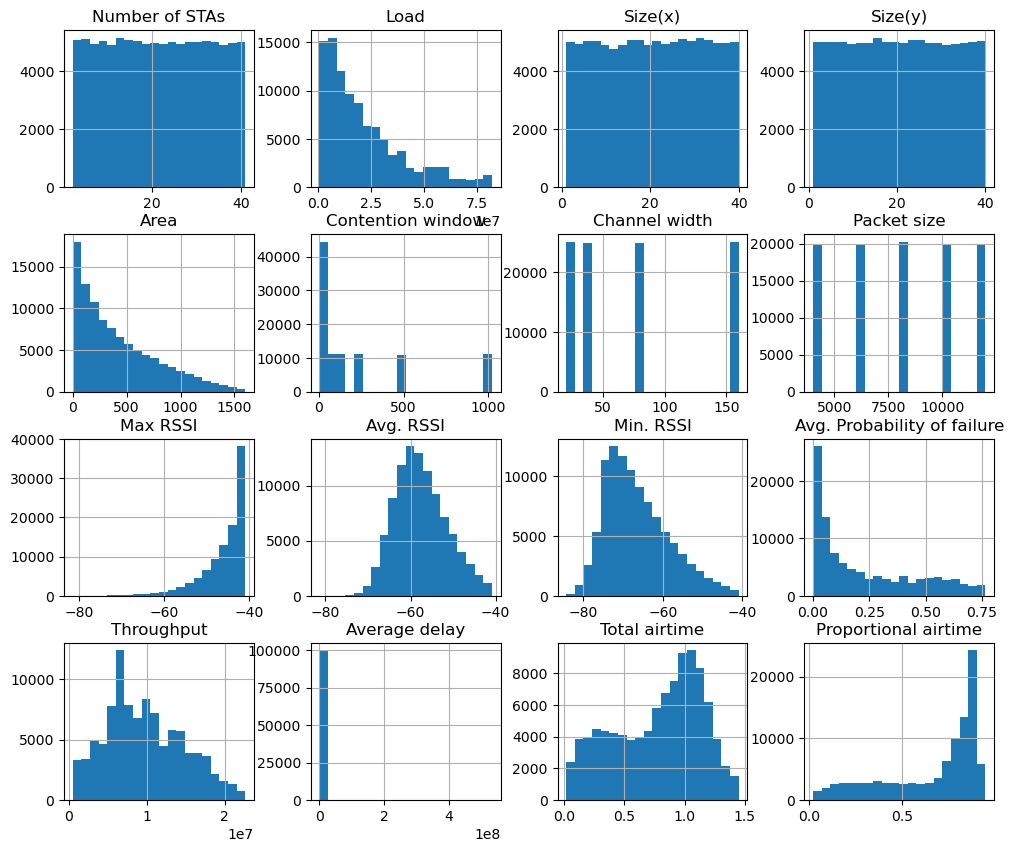

Mean Squared Error: 0.08013131848732774
R^2 Score: 0.9201624748773765


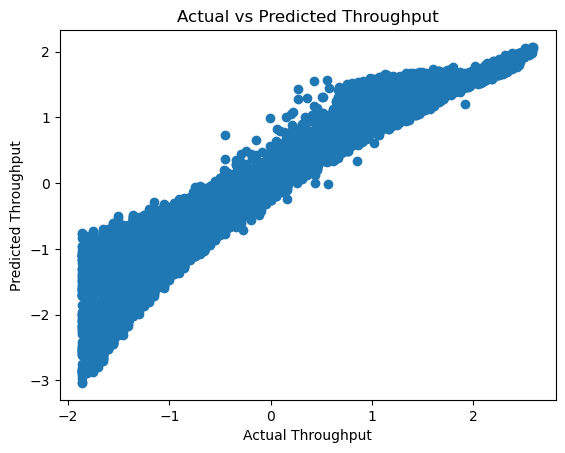

Train data shape: (80000, 16)
Test data shape: (20000, 16)


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define column names
COLUMN_NAMES = [
    "Number of STAs", "Load", "Size(x)", "Size(y)", "Area", "Contention window",
    "Channel width", "Packet size", "Max RSSI", "Avg. RSSI", "Min. RSSI", 
    "Avg. Probability of failure", "Throughput", "Average delay", "Total airtime", "Proportional airtime"
]

# Load dataset from txt file
def load_data(file_path):
    data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=COLUMN_NAMES)
    return data

# Display statistics
def display_statistics(data):
    print("Statistics:\n", data.describe())

# Plot distribution of features
def plot_distributions(data):
    data.hist(figsize=(12, 10), bins=20)
    plt.show()

# Clean data (handle missing values, outliers, etc.)
def clean_data(data):
    data = data.dropna()  # Remove missing values
    return data

# Handle categorical data (if applicable)
def encode_categorical(data):
    label_encoders = {}
    for col in data.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le
    return data, label_encoders

# Normalize data
def normalize_data(data):
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(data)
    return pd.DataFrame(normalized_data, columns=data.columns)

# Split data into train and test
def split_data(data, test_size=0.2):
    train, test = train_test_split(data, test_size=test_size, random_state=42)
    return train, test

# Train a linear regression model focusing on throughput
def train_linear_regression(train_data):
    X_train = train_data.drop(columns=["Throughput"])  # Features
    y_train = train_data["Throughput"]  # Target
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

# Evaluate model performance
def evaluate_model(model, test_data):
    X_test = test_data.drop(columns=["Throughput"])
    y_test = test_data["Throughput"]
    
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")
    
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Throughput")
    plt.ylabel("Predicted Throughput")
    plt.title("Actual vs Predicted Throughput")
    plt.show()

# Main processing function
def main():
    file_path = "dataset_Seminar1.txt"
    data = load_data(file_path)
    
    print("Dataset preview:\n", data.head())
    display_statistics(data)
    plot_distributions(data)
    
    data = clean_data(data)
    data, label_encoders = encode_categorical(data)
    normalized_data = normalize_data(data)
    
    train_data, test_data = split_data(normalized_data)
    
    model = train_linear_regression(train_data)
    evaluate_model(model, test_data)
    
    print("Train data shape:", train_data.shape)
    print("Test data shape:", test_data.shape)

if __name__ == "__main__":
    main()



